In [1]:
#Resume Project

In [2]:
#Libraries
import pandas as pd, requests, json,  os, math
from pandas import DataFrame, Series

In [3]:
def download(filename, url):
    # We do not download again if the file already exists
    if os.path.exists(filename):
        return (str(filename) + " already exists!")

    # Download the file from URL and save it in `filename`
    r = requests.get(url)
    r.raise_for_status()
    open(filename, 'wb').write(r.content)
    
    #Return verification message
    return (str(filename) + " created!")

In [4]:
#Get countries
download("countries.json", "https://raw.githubusercontent.com/DewanshBistaOfficial/DataScienceDemo/master/countries.json")
countries = pd.read_json('countries.json') 

#Get capitals
download("capitals.json", "https://raw.githubusercontent.com/DewanshBistaOfficial/DataScienceDemo/master/capitals.json")
capitals = pd.read_json('capitals.json') 

In [5]:
#q1: How many countries do we have in our dataset?
countries["country"].size

174

In [6]:
#q2: what is the total population across all the countries in our dataset?
countries["population"].sum()

6261901793

In [7]:
#q3: What are the capital names in capitals.json?
capital_list = sorted(capitals["capital"].to_list())
capital_list

['Abu Dhabi',
 'Abuja',
 'Accra',
 'Addis Ababa',
 'Algiers',
 'Amman',
 'Amsterdam',
 'Ankara',
 'Antananarivo',
 'Apia',
 'Ashgabat',
 'Asmara',
 'Astana',
 'Asuncion',
 'Athens',
 'Baghdad',
 'Baku',
 'Bamako',
 'Bangkok',
 'Beijing',
 'Beirut',
 'Belmopan',
 'Berlin',
 'Bern',
 'Bishkek',
 'Bissau',
 'Bogota',
 'Brasilia',
 'Bridgetown',
 'Brussels',
 'Bucharest',
 'Budapest',
 'Buenos Aires',
 'Bujumbura',
 'Cairo',
 'Canberra',
 'Caracas',
 'Castries',
 'Chisinau',
 'Colombo',
 'Conakry',
 'Copenhagen',
 'Dakar',
 'Damascus',
 'Dar es Salaam',
 'Dhaka',
 'Djibouti',
 'Doha',
 'Dublin',
 'Dushanbe',
 'Freetown',
 'Gaborone',
 'George Town',
 'Georgetown',
 'Guatemala City',
 'Hagatna',
 'Hamilton',
 'Hanoi',
 'Harare',
 'Havana',
 'Helsinki',
 'Islamabad',
 'Jakarta',
 'Jamestown',
 'Jerusalem',
 'Kabul',
 'Kampala',
 'Kathmandu',
 'Khartoum',
 'Kigali',
 'Kingston',
 'Kingstown',
 'Kuala Lumpur',
 'Kuwait City',
 'Kyiv',
 'La Paz',
 'Libreville',
 'Lilongwe',
 'Lima',
 'Lisbon',


In [8]:
#Gets the index of the indentity which is in the dataframe column typeof
def get_index(identity, typeof):
    s = capitals[typeof]
    a_dict = s[s == identity].to_dict()
    for number in a_dict:
        index = number
    return index

In [9]:
#q4: What is the capital of Italy?

#Get "Italy" index
index = get_index("Italy", "country")

#Get capital using index
capitals["capital"].get(index)

'Rome'

In [10]:
#q5: Which country's capital is Brussels?
#Get "Brussels" index
index = get_index("Brussels", "capital")

#Get country using index
capitals["country"].get(index)

'Belgium'

In [11]:
#q6: Which 7 countries have the southern-most capitals?
temp_capitals = capitals
temp_capitals = temp_capitals.sort_values(by=['latitude'])
temp_capitals.head(7)["country"].to_list()

['New Zealand',
 'Australia',
 'Uruguay',
 'Argentina',
 'Chile',
 'Lesotho',
 'Swaziland']

In [12]:
#q7: Which 10 countries have the capitals closest to the North Pole?
#Gets list while making sure to preserve integrity of capitals
temp_capitals = capitals
temp_capitals = temp_capitals.sort_values(by=['latitude'])
capital_list = temp_capitals.tail(10)["country"].to_list()

#Sorts list by closest
sorted_list = list()
for i in range(len(capital_list)):
    sorted_list.append(capital_list[len(capital_list) - 1 - i])
    
sorted_list

['Iceland',
 'Finland',
 'Norway',
 'Estonia',
 'Sweden',
 'Latvia',
 'Russia',
 'Denmark',
 'Lithuania',
 'Belarus']

In [13]:
#Calculates the distance between two areas using the Haversine formula
def get_distance(lat1, lon1, lat2, lon2, radius):
    #Change to radians
    lat1 = lat1 * math.pi/180
    lat2 = lat2 * math.pi/180
    lon1 = lon1 * math.pi/180
    lon2 = lon2 * math.pi/180    
    
    #Calculate distances
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    
    #Haversine formula
    a = (math.sin(dlat/2)**2) + (math.cos(lat1) * math.cos(lat2) * (math.sin(dlon/2) ** 2))
    c = 2 * math.asin(min(1, math.sqrt(a)))
    distance = radius * c
    return distance

In [14]:
#q8: What is the distance between Camp Randall Stadium and the Wisconsin State Capital?
#The latitude/longitude of Randall Stadium is 43.070231,-89.411893
#The latitude/longitude of the Wisconsin Capital is 43.074645,-89.384113
#The radius of the earth is 3956 miles
earth_radius = 3956
get_distance(43.070231,-89.411893, 43.074645, -89.384113, earth_radius)

1.4338994920742807

In [15]:
#Gets the distance between two countries 
#(calculated by their capitals and the haversine forumla)
def get_distance_country(country1, country2):
    index1 = get_index(country1, "country") 
    index2 = get_index(country2, "country")
    
    #Get coordinates
    lat1 = capitals["latitude"].get(index1)
    lon1 = capitals["longitude"].get(index1)
    lat2 = capitals["latitude"].get(index2)
    lon2 = capitals["longitude"].get(index2)    
    
    #Replace 0 with NaN
    result = get_distance(lat1, lon1, lat2, lon2, earth_radius)
    if result == 0 :
        result = float('nan')
    return result

In [16]:
#q9: What is the distance between Germany and Norway?
get_distance_country('Germany', 'Norway')

520.8581822565823

In [17]:
def get_country_data_frame(countryList):
    
    #Gets a 2D Array (Cols) of country distances in the countryList
    cols = list()
    for country in countryList:
        rows = list()
        for country2 in countryList:
            rows.append(get_distance_country(country, country2))
        cols.append(rows)
    
    #Make a data frame and return
    df = pd.DataFrame(cols, columns = countryList, index = countryList)
    return df

In [18]:
#q10: What are the distances between Switzerland, Netherlands and Spain?
country_list = ['Switzerland', 'Netherlands', 'Spain']
get_country_data_frame(country_list)

,Switzerland,Netherlands,Spain
Switzerland,NaN,392.028643,714.804467
Netherlands,392.028643,NaN,919.684100
Spain,714.804467,919.684100,NaN


In [19]:
#q11: What is the distance between every pair of countries in the South American continent?
temp_countries = countries
temp_countries = temp_countries[temp_countries['continent'] == 'South America']
country_list = temp_countries['country'].to_list()
south_df = get_country_data_frame(country_list)
south_df

,Chile,Guyana,Colombia,Suriname,Brazil,Bolivia,Venezuela,Argentina,Peru,Ecuador,Uruguay,Paraguay
Chile,NaN,2897.553095,2636.644599,2895.810776,1869.737031,1180.741903,3043.657689,690.784168,1531.480189,2350.207788,833.403262,963.635535
Guyana,2897.553095,NaN,1105.066312,215.336336,1709.071018,1747.772670,646.969843,2857.520462,1837.860149,1483.193753,2878.638295,2214.288286
Colombia,2636.644599,1105.066312,NaN,1303.405134,2275.516286,1512.119255,639.361118,2885.355610,1167.505359,451.004119,2962.230943,2337.615967
Suriname,2895.810776,215.336336,1303.405134,NaN,1572.674232,1778.772975,861.456786,2799.886429,1944.750017,1661.699022,2809.744412,2153.855447
Brazil,1869.737031,1709.071018,2275.516286,1572.674232,NaN,1342.297074,2228.690679,1459.139733,1967.770515,2344.584922,1412.096335,908.185710
Bolivia,1180.741903,1747.772670,1512.119255,1778.772975,1342.297074,NaN,1865.131181,1379.455701,669.926372,1326.758656,1467.253638,906.799256
Venezuela,3043.657689,646.969843,639.361118,861.456786,2228.690679,1865.131181,NaN,3157.624051,1705.418003,1088.064117,3207.352176,2544.799572
Argentina,690.784168,2857.520462,2885.355610,2799.886429,1459.139733,1379.455701,3157.624051,NaN,1936.465790,2696.149591,143.069943,646.036441
Peru,1531.480189,1837.860149,1167.505359,1944.750017,1967.770515,669.926372,1705.418003,1936.465790,NaN,823.054491,2046.571589,1558.635236
Ecuador,2350.207788,1483.193753,451.004119,1661.699022,2344.584922,1326.758656,1088.064117,2696.149591,823.054491,NaN,2791.196721,2218.650964


In [20]:
#Q12: What is the most central country in the South American continent?
#(Shortest average distance)
mean_df = south_df.describe().transpose()
minCountry = mean_df["mean"].idxmin()
minCountry

'Bolivia'

In [21]:
#q13: What is the least central country in South America?
#(Longest average distance)
mean_df = south_df.describe().transpose()
maxCountry = mean_df["mean"].idxmax()
maxCountry

'Uruguay'

In [22]:
#q14: How close is each country in South America to it's nearest neighbor?

#Creates lists to hold column data of data frame
#And a row names and column names
nearest_list = list()
distance_list = list()
column_header = ["nearest", "distance"]
row_header = list()

for country in south_df:
    #placeholder var
    nearest_country = south_df[country].idxmin()
    
    #Appends to list
    nearest_list.append(nearest_country)
    distance_list.append(get_distance_country(country, nearest_country))
    row_header.append(country)

#Makes the completed dataframe using list info
df = pd.DataFrame([nearest_list, distance_list], columns = row_header, index = column_header).transpose()
df

,nearest,distance
Chile,Argentina,690.784
Guyana,Suriname,215.336
Colombia,Ecuador,451.004
Suriname,Guyana,215.336
Brazil,Paraguay,908.186
Bolivia,Peru,669.926
Venezuela,Colombia,639.361
Argentina,Uruguay,143.07
Peru,Bolivia,669.926
Ecuador,Colombia,451.004


In [23]:
#q15: How far is each country in South America to it's furthest neighbor?

#Creates lists to hold column data of data frame
#And a row names and column names
furthest_list = list()
distance_list = list()
column_header = ["furthest", "distance"]
row_header = list()

for country in south_df:
    #placeholder var
    furthest_country = south_df[country].idxmax()
    
    #Appends to list
    furthest_list.append(furthest_country)
    distance_list.append(get_distance_country(country, furthest_country))
    row_header.append(country)

#Makes the completed dataframe using list info
df = pd.DataFrame([furthest_list, distance_list], columns = row_header, index = column_header).transpose()
df

,furthest,distance
Chile,Venezuela,3043.66
Guyana,Chile,2897.55
Colombia,Uruguay,2962.23
Suriname,Chile,2895.81
Brazil,Ecuador,2344.58
Bolivia,Venezuela,1865.13
Venezuela,Uruguay,3207.35
Argentina,Venezuela,3157.62
Peru,Uruguay,2046.57
Ecuador,Uruguay,2791.2


In [24]:
import sqlite3
conn = sqlite3.connect('countries.db')
countries.to_sql("countries", conn, if_exists="replace", index=False)
capitals.to_sql("capitals", conn, if_exists="replace", index=False)

# remember to do conn.close() at the end of your notebook


In [25]:
#q16: In our dataset, how many countries are in each continent?
#use a GROUP BY query in SQL
#sort by number of countries (least first)
#break ties alphabetically ("A" before "B", etc)
#the column names should be continent and number of countries

#Query the sql database
qry = """    
    SELECT continent, COUNT(country)
    FROM Countries
    GROUP BY continent;
"""

#Convert to  dataframe and rename
df = pd.read_sql(qry, conn)
df = df.sort_values(by=['COUNT(country)'])

#Had to remake data frame to get rows to be indexed properly (0, 1, 2... etc)
df = pd.DataFrame([df['continent'].to_list(), df['COUNT(country)'].to_list()])
df = df.transpose()
df = df.rename(columns= {0: 'continent', 1: 'number of countries'})

df

,continent,number of countries
0,Australia,12
1,South America,12
2,North America,24
3,Asia,38
4,Europe,41
5,Africa,47


In [26]:
%matplotlib inline

In [27]:
import matplotlib

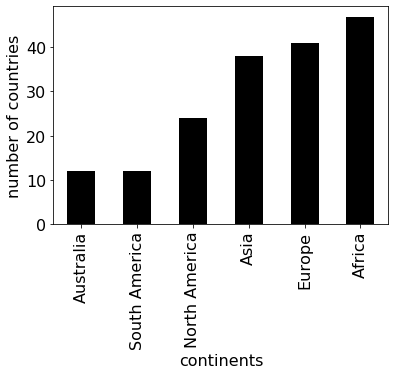

In [28]:
#q17: How many countries are in each continent? (answer with a plot)

#Get bar plot from dataframe
stat_list = df["number of countries"].to_list()
names_list = df["continent"].to_list()
plot_series = pd.Series(stat_list, index = names_list)
plot = plot_series.plot.bar(color="black", fontsize=16)

#Format plot labels
plot.set_ylabel("number of countries", fontsize=16)
plot.set_xlabel("continents", fontsize=16)

#Result
result_plot = plot

In [29]:
#q18: What is the total area of each continent?

#Query the sql database
qry = """    
    SELECT continent, SUM(area)
    FROM Countries
    GROUP BY continent;
"""

#Convert to  dataframe and rename
df = pd.read_sql(qry, conn)
df = df.sort_values(by=['SUM(area)'], ascending = False)

#Had to remake data frame to get rows to be indexed properly (0, 1, 2... etc)
df = pd.DataFrame([df['continent'].to_list(), df['SUM(area)'].to_list()])
df = df.transpose()
df = df.rename(columns= {0: 'continent', 1: 'total area'})

df

,continent,total area
0,Asia,29731231
1,Africa,25199550
2,Europe,23708430
3,North America,22327685
4,South America,17715335
5,Australia,8488612


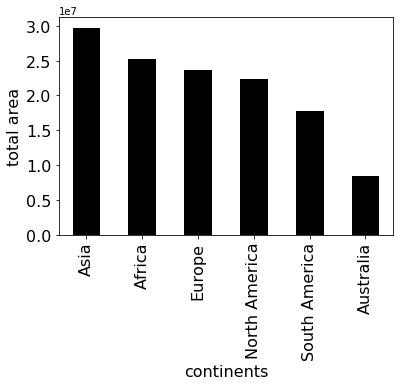

In [30]:
#q19: What is the total area of each continent? (answer with a plot)

#Get bar plot from dataframe
stat_list = df["total area"].to_list()
names_list = df["continent"].to_list()
plot_series = pd.Series(stat_list, index = names_list)
plot = plot_series.plot.bar(color="black", fontsize=16)

#Format plot labels
plot.set_ylabel("total area", fontsize=16)
plot.set_xlabel("continents", fontsize=16)

#Result
result_plot = plot

In [31]:
#q20: What is the area of each country in South America?
#Query the sql database
qry = """    
    SELECT country, area
    FROM Countries
    WHERE continent = "South America";
"""

#Convert to  dataframe and rename
df = pd.read_sql(qry, conn)

df = df.sort_values(by=['area'], ascending = False)

#Had to remake data frame to get rows to be indexed properly (0, 1, 2... etc)
df = pd.DataFrame([df['country'].to_list(), df['area'].to_list()])
df = df.transpose()
df = df.rename(columns= {0: 'country', 1: 'area'})

df

,country,area
0,Brazil,8511965
1,Argentina,2766890
2,Peru,1285220
3,Colombia,1138910
4,Bolivia,1098580
5,Venezuela,912050
6,Chile,756950
7,Paraguay,406750
8,Ecuador,283560
9,Guyana,214970


In [32]:
#q21: What are the top 8 countries that have the largest real GDP?
qry = """    
    SELECT country, population * "gdp-per-capita" / 1000000000.0
    FROM Countries
"""

#Convert to  dataframe and rename
df = pd.read_sql(qry, conn)

df = df.sort_values(by=['population * "gdp-per-capita" / 1000000000.0'], ascending = False)

#Had to remake data frame to get rows to be indexed properly (0, 1, 2... etc)
df = pd.DataFrame([df['country'].to_list(), df['population * "gdp-per-capita" / 1000000000.0'].to_list()])
df = df.transpose()
df = df.rename(columns= {0: 'country', 1: 'real GDP (billion)'})

df.head(8)

,country,real GDP (billion)
0,United States,11281.2
1,China,6569.87
2,Japan,3594.47
3,India,3176.52
4,Germany,2274.86
5,France,1680.18
6,United Kingdom,1678.87
7,Italy,1552.16


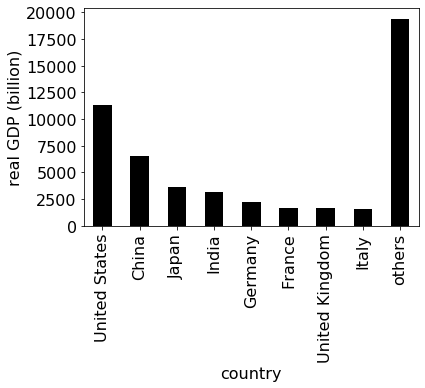

In [33]:
#q22: What are the top 8 countries that have the largest real GDP? (answer with a plot)

#Split list into two
tail_size = df["country"].size - 8
rest_frame = df.tail(tail_size)
head_frame = df.head(8)

#Get list from series
stat_list = head_frame["real GDP (billion)"].to_list()
names_list = head_frame["country"].to_list()

#Add others category
stat_list.append(rest_frame["real GDP (billion)"].sum())
names_list.append("others")

#Get bar plot from dataframe
plot_series = pd.Series(stat_list, index = names_list)
plot = plot_series.plot.bar(color="black", fontsize=16)

#Format plot labels
plot.set_ylabel("real GDP (billion)", fontsize=16)
plot.set_xlabel("country", fontsize=16)

#Result
result_plot = plot

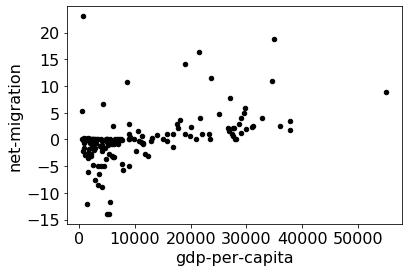

In [34]:
#q23: What is the relationship between GDP per capita and net-migration?
qry = """    
    SELECT "net-migration", "gdp-per-capita"
    FROM Countries
"""

#Convert to  dataframe and rename
df = pd.read_sql(qry, conn)
df = df.sort_values(by=['gdp-per-capita'], ascending = False)

#Had to remake data frame to get rows to be indexed properly (0, 1, 2... etc)
df = pd.DataFrame([df['net-migration'].to_list(), df['gdp-per-capita'].to_list()])
df = df.transpose()
df = df.rename(columns= {0: 'net-migration', 1: 'gdp-per-capita'})

#Make plot from dataframe
ax = df.plot.scatter(y = 'net-migration', x = 'gdp-per-capita', color="black", fontsize=16)
ax.set_ylabel('net-migration', fontsize=16)
ax.set_xlabel('gdp-per-capita', fontsize=16)

final_plot = ax

In [35]:
#q24: What is the correlation between GDP per capita and net-migration?
df.corr().loc['net-migration', 'gdp-per-capita']

0.45232113250112843

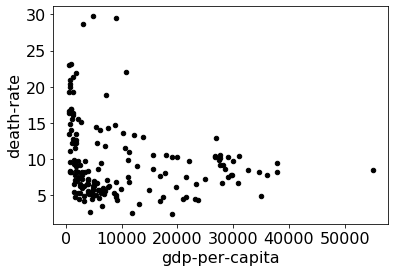

In [36]:
#q25: What is the relationship between GDP per capita and death rates?:
qry = """    
    SELECT "death-rate", "gdp-per-capita"
    FROM Countries
"""

#Convert to  dataframe and rename
df = pd.read_sql(qry, conn)
df = df.sort_values(by=['gdp-per-capita'], ascending = False)

#Had to remake data frame to get rows to be indexed properly (0, 1, 2... etc)
df = pd.DataFrame([df['death-rate'].to_list(), df['gdp-per-capita'].to_list()])
df = df.transpose()
df = df.rename(columns= {0: 'death-rate', 1: 'gdp-per-capita'})

#Make plot from dataframe
ax = df.plot.scatter(y = 'death-rate', x = 'gdp-per-capita', color="black", fontsize=16)
ax.set_ylabel('death-rate', fontsize=16)
ax.set_xlabel('gdp-per-capita', fontsize=16)

final_plot = ax

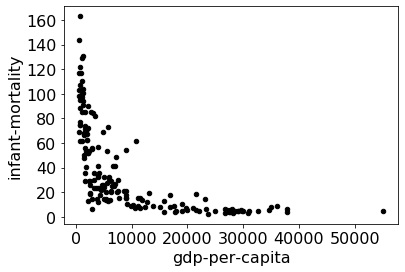

In [37]:
#Q26: What is the relationship between GDP per capita and infant-mortality?
qry = """    
    SELECT "infant-mortality", "gdp-per-capita"
    FROM Countries
"""

#Convert to  dataframe and rename
df = pd.read_sql(qry, conn)
df = df.sort_values(by=['gdp-per-capita'], ascending = False)

#Had to remake data frame to get rows to be indexed properly (0, 1, 2... etc)
df = pd.DataFrame([df['infant-mortality'].to_list(), df['gdp-per-capita'].to_list()])
df = df.transpose()
df = df.rename(columns= {0: 'infant-mortality', 1: 'gdp-per-capita'})

#Make plot from dataframe
ax = df.plot.scatter(y = 'infant-mortality', x = 'gdp-per-capita', color="black", fontsize=16)
ax.set_ylabel('infant-mortality', fontsize=16)
ax.set_xlabel('gdp-per-capita', fontsize=16)

final_plot = ax

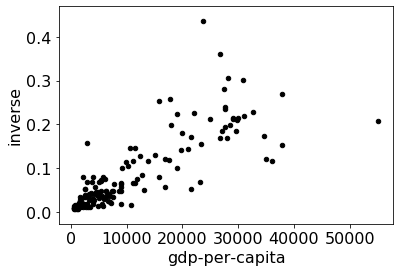

In [38]:
#Q27: What is the relationship between GDP per capita and inverse of infant-mortality?
qry = """    
    SELECT 1 / "infant-mortality", "gdp-per-capita"
    FROM Countries
"""

#Convert to  dataframe and rename
df = pd.read_sql(qry, conn)
df = df.sort_values(by=['gdp-per-capita'], ascending = False)

#Had to remake data frame to get rows to be indexed properly (0, 1, 2... etc)
df = pd.DataFrame([df['1 / "infant-mortality"'].to_list(), df['gdp-per-capita'].to_list()])
df = df.transpose()
df = df.rename(columns= {0: 'inverse', 1: 'gdp-per-capita'})

#Make plot from dataframe
ax = df.plot.scatter(y = 'inverse', x = 'gdp-per-capita', color="black", fontsize=16)
ax.set_ylabel('inverse', fontsize=16)
ax.set_xlabel('gdp-per-capita', fontsize=16)

final_plot = ax

In [39]:
import numpy as np

In [40]:
#q28: fit a y = m * x + n line to the scatter plot in question 27 
#using the least-squares method; what are the coefficients m and n?

#Calculate coefficents
df["1"] = 1
res = np.linalg.lstsq(df[["gdp-per-capita", "1"]], df["inverse"], rcond=None)
coefficients = res[0]
m = coefficients[0]
n = coefficients[1]

#Gets tuple
a = (m, n)
a

(6.4829831548483e-06, 0.013237849092120849)

In [41]:
#q29: When gdp-per-capita = 50000, what is the expected value for infant-mortality?
result = 50000 * m + n
result = 1/result
result

2.9639552790793404

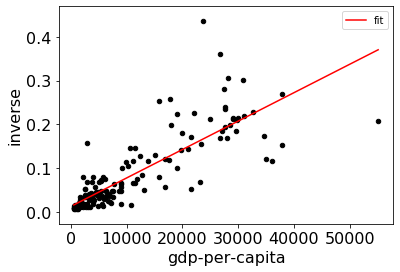

In [42]:
#q30: plot the regression line to the scatter plot

#Make fit line
df["fit"] = df["gdp-per-capita"] * m + n

#Make plot from dataframe
ax = df.plot.scatter(y = 'inverse', x = 'gdp-per-capita', color="black", fontsize=16)
ax.set_ylabel('inverse', fontsize=16)
ax.set_xlabel('gdp-per-capita', fontsize=16)

df.plot.line(x ='gdp-per-capita', y='fit', c='red', ax=ax)